Graph with 5 nodes and 8 edges
Graph with 5 nodes and 8 edges


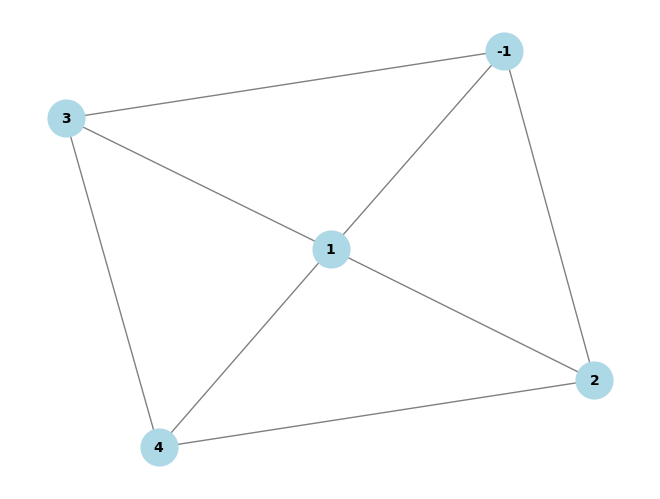

In [25]:
import commons
from commons import DIRECTIONS
import networkx as nx
import matplotlib.pyplot as plt
class Graph:
    def __init__(self):
        self.nodes = {}
        self.edges = []

    def add_node(self, node):
        if node not in self.nodes:
            self.nodes[node] = []

    def add_edge(self, node1, node2):
        if node1 in self.nodes and node2 in self.nodes:
            self.edges.append((node1, node2))
            self.nodes[node1].append(node2)
            self.nodes[node2].append(node1)  # Assuming undirected graph for simplicity


    


class GraphBuilder:
    @staticmethod
    def build_graph(grid):
        graph = nx.Graph()
        nrows, ncols = len(grid), len(grid[0])

        for r in range(nrows):
            for c in range(ncols):
                color = grid[r][c]
                # 각 셀의 색상을 노드로 추가. 이미 존재하는 경우 무시됨.
                graph.add_node(color)

                # 현재 셀의 색상과 인접한 다른 색상들 사이에 엣지 생성
                for dr, dc in [(1, 0), (-1, 0), (0, 1), (0, -1)]:  # 상하좌우 인접 셀 확인
                    nr, nc = r + dr, c + dc
                    if 0 <= nr < nrows and 0 <= nc < ncols:
                        neighbor_color = grid[nr][nc]
                        if neighbor_color != color:
                            # 서로 다른 색상 사이에 엣지 추가
                            graph.add_edge(color, neighbor_color)

        return graph


    @staticmethod
    def build_weighted_graph(grid):
        nrows, ncols = len(grid), len(grid[0])
        graph = nx.Graph()
    
        # 색상별 셀의 개수를 저장하기 위한 딕셔너리
        color_counts = {}
    
        for r in range(nrows):
            for c in range(ncols):
                color = grid[r][c]
                # 색상별 셀의 개수 업데이트
                if color in color_counts:
                    color_counts[color] += 1
                else:
                    color_counts[color] = 1
    
                # 노드가 아직 그래프에 없으면 추가
                if not graph.has_node(color):
                    graph.add_node(color, weight=color_counts[color])
                else:
                    # 노드의 가중치(색상별 셀의 개수) 업데이트
                    nx.set_node_attributes(graph, {color: {'weight': color_counts[color]}})
    
                # 현재 셀의 색상과 인접한 다른 색상들 찾기
                for dr, dc in DIRECTIONS:
                    nr, nc = r + dr, c + dc
                    if 0 <= nr < nrows and 0 <= nc < ncols:
                        neighbor_color = grid[nr][nc]
                        if neighbor_color != color:
                            graph.add_edge(color, neighbor_color)
    
        return graph


class GraphDrawer:
    @staticmethod
    def draw_graph(graph):
        #G = nx.Graph()
    
        # # 그래프 구성: 노드와 에지 추가
        # for node, edges in graph.items():
        #     G.add_node(node)
        #     for edge in edges:
        #         G.add_edge(node, edge)
        print(graph)
        # 노드 위치 결정
        pos = nx.spring_layout(graph)
    
        # 그래프 드로잉
        nx.draw(graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700, font_size=10, font_weight='bold')
        #nx.draw_networkx_labels(graph, pos)
        plt.show()

    @staticmethod
    def draw_weighted_graph(graph):
        pos = nx.spring_layout(graph)
        node_sizes = [1000 * graph.nodes[node]['weight']^2 for node in graph.nodes]
        nx.draw(graph, pos, with_labels=True, node_size=node_sizes, node_color='skyblue', edge_color='gray')
        node_labels = nx.get_node_attributes(graph, 'weight')
        nx.draw_networkx_labels(graph, pos)
        plt.show()

# Example usage:
grid = commons.test_grid
graph = GraphBuilder.build_graph(grid)
print(graph)
GraphDrawer.draw_graph(graph)
# grf = GridGraph(grid)
# grf.build_graph()
# for node,edge in graph:
#     print(f'{node}:{edge}')
# GraphDrawer.draw_graph(graph)

# This is a basic structure and the implementation details (especially in GraphBuilder and GraphDrawer) need to be filled out based on the specific requirements of the grid and drawing methods.


In [21]:
import networkx as nx
import matplotlib.pyplot as plt

class Graph:
    def __init__(self):
        self.nodes = {}
        self.edges = []

    def add_node(self, node):
        if node not in self.nodes:
            self.nodes[node] = []

    def add_edge(self, node1, node2):
        if node1 in self.nodes and node2 in self.nodes:
            self.edges.append((node1, node2))
            self.nodes[node1].append(node2)
            self.nodes[node2].append(node1)  # Assuming undirected graph for simplicity

    def to_networkx_graph(self):
        G = nx.Graph()
        for node in self.nodes:
            G.add_node(node)
        for edge in self.edges:
            G.add_edge(*edge)
        return G
    
    def __str__(self):
        output = "Graph:\nNodes:\n"
        for node, edges in self.nodes.items():
            output += f"  {node}: {edges}\n"
        output += "Edges:\n"
        for edge in self.edges:
            output += f"  {edge}\n"
        return output 
    

class GraphBuilder:
    @staticmethod
    def build_graph(grid):
        g = nx.Graph()
        nrows, ncols = len(grid), len(grid[0])

        for r in range(nrows):
            for c in range(ncols):
                color = grid[r][c]
                # 각 셀의 색상을 노드로 추가. 이미 존재하는 경우 무시됨.
                g.add_node(color)

                # 현재 셀의 색상과 인접한 다른 색상들 사이에 엣지 생성
                for dr, dc in [(1, 0), (-1, 0), (0, 1), (0, -1)]:  # 상하좌우 인접 셀 확인
                    nr, nc = r + dr, c + dc
                    if 0 <= nr < nrows and 0 <= nc < ncols:
                        neighbor_color = grid[nr][nc]
                        if neighbor_color != color:
                            # 서로 다른 색상 사이에 엣지 추가
                            g.add_edge(color, neighbor_color)

        return g
    
    

class GraphDrawer:
    @staticmethod
    def draw_graph(graph):
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700, font_size=10, font_weight='bold')
        plt.show()

# Example usage:
grid = commons.test_grid
print(grid)
graph = GraphBuilder.build_graph(grid)
print(graph)
GraphDrawer.draw_graph(graph)



[[2, 2, 2, -1, -1], [4, 1, 1, -1, -1], [4, 1, 3, -1, -1], [4, 4, 3, 3, 3], [4, 4, 3, 3, 3]]
Graph with 5 nodes and 8 edges


NameError: name 'G' is not defined

[[-2, -2, -2, -2, -2, -2, -2], [-5, 2, 2, 2, -1, -1, -4], [-5, 4, 1, 1, -1, -1, -4], [-5, 4, 1, 3, -1, -1, -4], [-5, 4, 4, 3, 3, 3, -4], [-5, 4, 4, 3, 3, 3, -4], [-3, -3, -3, -3, -3, -3, -3]]
2: [-2, 4, -5, 1, -1]
-2: [2]
4: [2, -5, 1, 3, -3]
-5: [2, 4]
1: [2, 4, 3, -1]
-1: [2, 1, 3]
3: [1, -1, 4, -4, -3]
-4: [3]
-3: [4, 3]


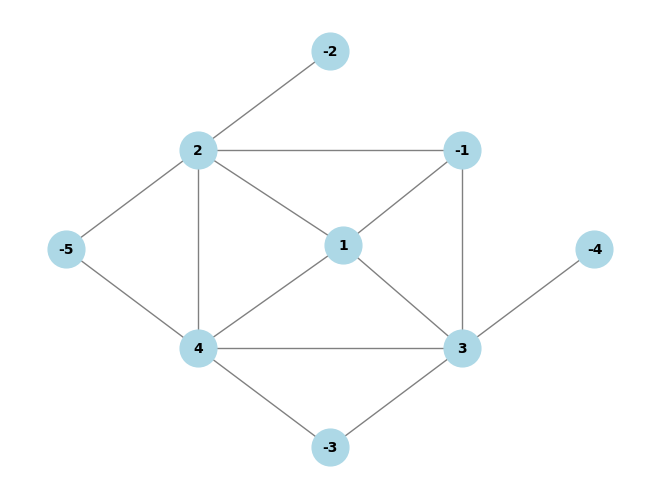

2: [-2, 4, -5, 1, -1]
-2: [2]
4: [2, -5, 1, 3, -3]
-5: [2, 4]
1: [2, 4, 3, -1]
-1: [2, 1, 3]
3: [1, -1, 4, -4, -3]
-4: [3]
-3: [4, 3]


In [23]:
import networkx as nx
from commons import test_grid2, DIRECTIONS
import matplotlib.pyplot as plt
class GridGraph:
    def __init__(self, grid):
        self.nrows, self.ncols = len(grid), len(grid[0])
        self.grid = grid # 있어야 되는지 없어도 되는지 잘 모르겠다. 있어야 될듯. 왜냐하면 grid를 받아서 nrow와 ncol이 생성되니까.
        self.graph = nx.Graph() 
    
    def print_graph(self):
        for node in self.graph.nodes:
            print(f'{node}: {list(self.graph.adj[node])}')
        
    def build_graph(self):
        
        for r in range(self.nrows):
            for c in range(self.ncols):
                color = self.grid[r][c]
                # 각 셀의 색상을 노드로 추가. 이미 존재하는 경우 무시됨.
                self.graph.add_node(color)

                # 현재 셀의 색상과 인접한 다른 색상들 사이에 엣지 생성
                for dr, dc in [(1, 0), (-1, 0), (0, 1), (0, -1)]:  # 상하좌우 인접 셀 확인
                    nr, nc = r + dr, c + dc
                    if 0 <= nr < self.nrows and 0 <= nc < self.ncols:
                        neighbor_color = self.grid[nr][nc]
                        if neighbor_color != color:
                            # 서로 다른 색상 사이에 엣지 추가
                            self.graph.add_edge(color, neighbor_color)

    def build_weighted_graph(self):

        # 색상별 셀의 개수를 저장하기 위한 딕셔너리
        color_counts = {}
    
        for r in range(self.nrows):
            for c in range(self.ncols):
                color = self.grid[r][c]
                # 색상별 셀의 개수 업데이트
                if color in color_counts:
                    color_counts[color] += 1
                else:
                    color_counts[color] = 1
    
                # 노드가 아직 그래프에 없으면 추가
                if not self.graph.has_node(color):
                    self.graph.add_node(color, weight=color_counts[color])
                else:
                    # 노드의 가중치(색상별 셀의 개수) 업데이트
                    nx.set_node_attributes(self.graph, {color: {'weight': color_counts[color]}})
    
                # 현재 셀의 색상과 인접한 다른 색상들 찾기
                for dr, dc in DIRECTIONS:
                    nr, nc = r + dr, c + dc
                    if 0 <= nr < self.nrows and 0 <= nc < self.ncols:
                        neighbor_color = self.grid[nr][nc]
                        if neighbor_color != color:
                            self.graph.add_edge(color, neighbor_color)
    
        return graph
    
    # 이걸 이렇게 할 게 아니라, grid는 고정되어 있다고 생각하고, 단지 inside cell만 연결되도록 하자. 0부터 nrows로 변경하고 -1 만 제외하면 될듯. 
    # def build_graph_inside_cells(self):
    # 
    #     for r in range(1, self.nrows-1):  # Adjusted range to exclude first and last row
    #         for c in range(1, self.ncols-1):  # Adjusted range to exclude first and last column
    #             color = self.grid[r][c]
    #             if color > 0:  # Check if color is positive before adding to graph
    #                 self.graph.add_node(color)  # Add node if not present
    # 
    #             for dr, dc in DIRECTIONS:
    #                 nr, nc = r + dr, c + dc
    #                 if 0 <= nr < self.nrows and 0 <= nc < self.ncols:
    #                     neighbor_color = self.grid[nr][nc]
    #                     if color > 0 and neighbor_color > 0 and neighbor_color != color:
    #                         self.graph.add_edge(color, neighbor_color)  # Add an edge between different colors
    # 
        print(self.graph)
        
        
    def build_graph_with_inside_cells(self):
        """
        build graph with element color of the cell is greater than 1
        :return: 
        """

        for r in range(self.nrows):  # Adjusted range to exclude first and last row
            for c in range(self.ncols):  # Adjusted range to exclude first and last column
                color = self.grid[r][c]
                if color > 0:  # Check if color is positive before adding to graph
                    self.graph.add_node(color)  # Add node if not present

                for dr, dc in DIRECTIONS:
                    nr, nc = r + dr, c + dc
                    if 0 <= nr < self.nrows and 0 <= nc < self.ncols:
                        neighbor_color = self.grid[nr][nc]
                        if color > 0 and neighbor_color > 0 and neighbor_color != color:
                            self.graph.add_edge(color, neighbor_color)  # Add an edge between different colors

        print(self.graph)    
        
        
    # def build_graph_inside_cells(self):
    # 
    #     for r in range(self.nrows)[1:self.nrows-1]:
    #         for c in range(self.ncols)[1:self.ncols-1]:
    #             color = self.grid[r][c]
    #             if color not in self.graph and color > 0:
    #                 self.graph[color] = set()
    # 
    #             # 현재 셀의 색상과 인접한 다른 색상들 찾기
    #             for dr, dc in DIRECTIONS:
    #                 nr, nc = r + dr, c + dc
    #                 if 0 <= nr < self.nrows and 0 <= nc < self.ncols:
    #                     neighbor_color = self.grid[nr][nc]
    #                     if color < 0 or neighbor_color < 0:
    #                         break
    #                     elif neighbor_color != color:
    #                         self.graph[color].add(neighbor_color)
    #     return graph          
    
    # def build_graph_not_connect_outside(grid):
    #     nrows, ncols = len(grid), len(grid[0])
    #     graph = {}
    # 
    #     # 인접 셀을 확인하기 위한 방향 벡터
    #     directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    # 
    #     for r in range(nrows)[1:nrows-1]:
    #         for c in range(ncols)[1:ncols-1]:
    #             color = grid[r][c]
    #             if color not in graph and color > 0:
    #                 graph[color] = set()
    # 
    #             # 현재 셀의 색상과 인접한 다른 색상들 찾기
    #             for dr, dc in directions:
    #                 nr, nc = r + dr, c + dc
    #                 if 0 <= nr < nrows and 0 <= nc < ncols:
    #                     neighbor_color = grid[nr][nc]
    #                     if color < 0 and neighbor_color < 0:
    #                         break
    #                     elif neighbor_color != color:
    #                         graph[color].add(neighbor_color)
    #     print(graph)
        

    # 4-way graph
    def build_graph_with_networkx(self):
    
        for r in range(self.nrows)[1:self.nrows-1]:
            for c in range(self.ncols)[1:self.ncols-1]:
                color = grid[r][c]
                if color > 0 and color not in self.graph:
                    self.graph.add_node(color)  # Add the node to the graph if it's not already added
    
                # 현재 셀의 색상과 인접한 다른 색상들 찾기
                for dr, dc in DIRECTIONS:
                    nr, nc = r + dr, c + dc
                    if 0 <= nr < self.nrows and 0 <= nc < self.ncols:
                        neighbor_color = self.grid[nr][nc]
                        if color < 0 and neighbor_color < 0:
                            break
                        #elif neighbor_color != color and neighbor_color > 0:
                        elif neighbor_color != color :
                            self.graph.add_edge(color, neighbor_color)  # Add an edge between different colors
    
        self.print_graph()
        
        
    def draw_graph(self):        
        pos = nx.spring_layout(self.graph)
        nx.draw(self.graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700, font_size=10, font_weight='bold')
        plt.show()
        
    def draw_weighted_graph(self):
        pos = nx.spring_layout(self.graph)
        node_sizes = [1000 * self.graph.nodes[node]['weight']^2 for node in self.graph.nodes]
        nx.draw(self.graph, pos, with_labels=True, node_size=node_sizes, node_color='skyblue', edge_color='gray')
        node_labels = nx.get_node_attributes(self.graph, 'weight')
        nx.draw_networkx_labels(self.graph, pos)
        plt.show()

    import numpy as np
    def draw_graph_with_boundary(self):
        """
        주어진 그래프 정보를 바탕으로 그래프를 시각화
        -2:맨 위로
        -3:맨 아래쪽
        -4:맨 오른쪽
        -5:맨 왼쪽
    
        Parameters:
        graph (dict): 노드와 에지를 포함하는 그래프 정보. 각 키는 노드(색상)이며,
                      값은 해당 노드에 인접한 노드(색상)의 집합입니다.
        """
    
        # 그래프 구성: 노드와 에지 추가
        # for node, edges in graph.items():
        #     G.add_node(node)
        #     for edge in edges:
        #         G.add_edge(node, edge)
        # print(G)
        
        # 노드 위치 결정
        # outside space: boundary는 맨 가장자리에 위치
        pos = nx.spring_layout(self.graph)
        pos[-2] = (0, 2)     
        pos[-3] = (0, -2)     
        pos[-4] = (2, 0)     
        pos[-5] = (-2, 0)    
        pos[2] = [-1, 1]        
        pos[4] = [-1, -1]
        pos[3] = [1, -1]
        pos[-1] = [1, 1]
        # pos.update(nx.spring_layout(self.graph, pos=pos, fixed=[-2,-3,-4,-5]))
        
        # 그래프 드로잉
        nx.draw(self.graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700, font_size=10, font_weight='bold')
    
        # 표시
        plt.show()
        
    def arrange_corner(self):
        
# from commons import test_grid_boundary


# graph = GridGraph(grid)
# graph.build_graph()
# graph.draw_graph()
# graph.build_weighted_graph()
# graph.draw_weighted_graph()
grid = test_grid2
print(grid)
graph = GridGraph(grid)
graph.build_graph_with_networkx()
graph.draw_graph_with_boundary()
graph.print_graph()



In [ ]:
[[-2, -2, -2, -2, -2, -2, -2], 
 [-5,  2,  2,  2, -1, -1, -4], 
 [-5,  4,  1,  1, -1, -1, -4], 
 [-5,  4,  1,  3, -1, -1, -4], 
 [-5,  4,  4,  3,  3,  3, -4], 
 [-5,  4,  4,  3,  3,  3, -4], 
 [-3, -3, -3, -3, -3, -3, -3]]